In [ ]:
import tensorflow as tf

In [2]:
from utils_052621_tf2_github import *

In [3]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import pickle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

prefix = 'D:/Dropbox (Partners Healthcare)/'
datafolder = prefix+'profile_2021/derived_data/curate_all/'
modelfolder = prefix+'profile_2021/derived_data/curate_all/models/imaging'

In [4]:
# read dataset into Pandas (pd)
# Load labeled data. Columns any_cancer, adrenal, bone, brain, liver, lung, nodes, peritoneum, pleura, response, progression represent gold standard labels.

label_analysis = pd.read_csv(datafolder+'labeled_imaging.csv')
label_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                31360 non-null  int64  
 1   dfci_mrn                  31360 non-null  float64
 2   cancer_type               31360 non-null  object 
 3   image_scan_type           31360 non-null  float64
 4   date                      31360 non-null  object 
 5   head_imaged               31360 non-null  float64
 6   neck_imaged               31360 non-null  float64
 7   spine_imaged              31360 non-null  float64
 8   chest_imaged              31360 non-null  float64
 9   abdomen_imaged            31360 non-null  float64
 10  pelvis_imaged             31360 non-null  float64
 11  any_cancer                31360 non-null  int64  
 12  progression               31360 non-null  int64  
 13  response                  31360 non-null  int64  
 14  brain_

In [ ]:
train_data = label_analysis[label_analysis.split=='train']
valid_data = label_analysis[label_analysis.split=='validation']
test_data = label_analysis[label_analysis.split=='test']


training_patients = train_data.dfci_mrn.unique()
np.random.seed(43)
np.random.shuffle(training_patients)
splits = np.array_split(training_patientemp)[0:4]

In [6]:
# how many notes were labeled as indicating any cancer 
print(train_data.any_cancer.value_counts())

1    14682
0    10903
Name: any_cancer, dtype: int64


In [7]:
# how many notes were labeled as indicating response/improving cancer 
print(train_data.response.value_counts())

0    23916
1     1669
Name: response, dtype: int64


In [8]:
# # how many notes were labeled as indicating progression/worsening cancer
print(train_data.progression.value_counts())

0    19915
1     5670
Name: progression, dtype: int64


In [9]:
train_tokenizer = False
vocab_size = 20000
max_note_length = 1000

In [10]:
# set up datasets for training
# this method requires a 'tokenizer' to turn unique words into unique numbers
if train_tokenizer:
    tokenizer = Tokenizer(num_words = vocab_size)
    tokenizer.fit_on_texts([str(x) for x in train_data['text']])
    with open(modelfolder+'/tokenizer_imaging.pickle', 'wb') as handle:
         pickle.dump(tokenizer, handle, protocol=3)


In [11]:
# load tokenizer if already trained
with open(modelfolder+'/tokenizer_imaging.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
    

In [12]:
# ML imports
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, concatenate, Average
from tensorflow.keras.layers import Embedding
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, LSTM, TimeDistributed, GRU, Bidirectional, Layer
from tensorflow.keras import backeAttention

In [13]:
# set up deep learning model
max_note_length = 1000

def get_simple_model(target):
    vocab_size = 20000
    embedding_dims = 300
    filters = 300
    kernel_size = 10
    epochs = 2
    hidden_dims = 250
    max_note_length=1000
    batch_size = 32


    # make model
    text_input = Input(shape=(max_note_length,), de='float32')



    text_embed = Embedding(vocab_size, embedding_dims, input_length=max_note_length, mask_zero=.5)(text_embed)

    
    cnn1 = Conv1D(filters=filters, kernel_size=kernel_size, strides=1, padding='valid')(text_embed)
    x = GlobalMaxn(max_note_length)(bidir)




    hidden = Dense(hidden_dims)(x)
    hidden    hidden = Activation('relu')(hidden)

    anycancer_hidden = Dense(hidden_dims)(x)
    anycancer_out = Dense(1, activation='linear')(anycancer_hidden)
    
    if target == 'any_cancer':
        model = Model(inputs=text_input, outputs=anycancer_out)
        model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    else:
        x = concatenate([hidden, anycancer_hidden])
        target_hidden = Dense(hidden_dims)(x)
        target_out = Dense(1, activation='linear')(target_hidden)
        model = Model(inputs=text_input, outputs=[target_out, anycancer_out])
        model.compile(loss=tf.keras.losses.Binaryion likes kernel_size==3 with shallower net

In [15]:
dummy_model = get_simple_model('any_cancer')
print(dummy_model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1000, 300)         6000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 991, 300)          900300    
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               75250     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 6,975,801
Trainable params: 6,975,801
Non-trainable params: 0
___________________________________________________

In [16]:
train_data.cancer_type.value_counts()

nsclc           7159
breast          4690
prostate        4050
crc             3620
pancreas        2723
rcc_barkouny    2514
bladder_xu       829
Name: cancer_type, dtype: int64

In [17]:
train_data.groupby('dfci_mrn').first().cancer_type.value_counts()

nsclc           485
crc             377
prostate        376
rcc_barkouny    355
pancreas        323
breast          289
bladder_xu      107
Name: cancer_type, dtype: int64

In [18]:
train_models = False

train_histologies = ['nsclc','breast','crc','prostate','pancreas','bladder_xu','rcc_barkouny']
extra_model_label = 'train'

In [19]:
x_text_valid = sequence.pad_sequences(tokenizer.texts_to_sequences([str(x) for x in valid_data['text']]), maxlen=max_note_length, padding='post')
prediction_set = []


pd.set_option('mode.chained_assignment', None
              
# cross-validation model training (train on 90% of training data to do inference on remaining 10%)


for i in range(10):

    thissplit_data = train_data[(~train_data.dfci_mrn.isin(splits[i])) & (train_data.cancer_type.isin(train_histologies))]
    prediction_split = train_data[train_data.dfci_mrn.isin(splits[i])]
    prediction_split['split'] = 'train_' + str(i)
    
    x_text_train = sequence.pad_sequences(tokenizer.texts_to_sequences([str(x) for x in thissplit_data['text']]), maxlen=max_note_length, padding='post')
    text_predict = sequence.pad_sequences(tokenizer.texts_to_sequences([str(x) for x in prediction_split['text']]), maxlen=max_note_length, padding='post')

    for j in ['any_cancer', 'progression', 'response', 'brain_met', 'bone_met', 'adrenal_met', 'liver_met', 'lung_met', 'node_met', 'peritoneal_met']:
        callbacks = [
            tf.keras.callbacks.ModelCheckpoint(
                filepath=modelfolder + '/' + j+str(i)+extra_model_label+'.h5',
                save_best_only=False,
                save_weights_only=True,
                monitor='val_loss',
                verbose=0),
        ]

        this_model = get_simple_model(j)
        
        if train_models:
            if j == 'any_cancer':
                this_model.fit(x_text_train, thissplit_data[j].values,
                         validation_data=(x_text_valid, valid_data[j].values),
                         epochs=2,
                         batch_size = 32, verbose = 1, use_multiprocessing=True, callbacks=callbacks)
            else:
                this_model.fit(x_text_train, [thissplit_data[j].values, thissplit_data['any_cancer'].values],
                         validation_data=(x_text_valid, [valid_data[j].values, valid_data['any_cancer'].values]),
                         epochs=2,
                         batch_size = 32, verbose = 1, use_multiprocessing=True, callbacks=callbacks)            

        this_model.load_weights(modelfolder + '/' + j+str(i)+extra_model_label+'.h5')
        
        if j== 'any_cancer':
            prediction_split['cv_'+j+'_prediction'] = this_model.predict(text_predict)
        else:
            prediction_split['cv_'+j+'_prediction'] = this_model.predict(text_predict)[0]
            
        
    
    prediction_set.append(prediction_split)
    

In [20]:
def get_ensemble_model(outcome):
    model_list = []
    predictions = []
    ensemble_input = Input(shape=(max_note_length,), dtype='float32')
    for i in range(10):
        thismod = get_simple_model(outcome)
        thismod.load_weights(modelfolder+'/'+outcome+str(i)+extra_model_label+'.h5')
        model_list.append(thismod)
    
    for i in range(10):
        if outcome=='any_cancer':
            predictions.append(model_list[i](ensemble_input))
        else:
            predictions.append(model_list[i](ensemble_input)[0])

    
    output = Average()(predictions)
    model = Model(inputs = ensemble_input, outputs = output)
    model.save_weights(modelfolder + '/' + 'ensemble_'+outcome+extra_model_label+'.h5')
    return model
    
    
    
    

In [21]:
dummy_ensemble = get_ensemble_model('progression')
dummy_ensemble.summary()

Model: "model_111"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_102 (InputLayer)          [(None, 1000)]       0                                            
__________________________________________________________________________________________________
model_101 (Functional)          [(None, 1), (None, 1 7176552     input_102[0][0]                  
__________________________________________________________________________________________________
model_102 (Functional)          [(None, 1), (None, 1 7176552     input_102[0][0]                  
__________________________________________________________________________________________________
model_103 (Functional)          [(None, 1), (None, 1 7176552     input_102[0][0]                  
__________________________________________________________________________________________

In [22]:
# apply ensemble model to validation set data to evaluate it
x_text_valid = sequence.pad_sequences(tokenizer.texts_to_sequences([str(x) for x in valid_data['text']]), maxlen=max_note_length, padding='post')

prediction_split = valid_data
prediction_split['split'] = 'valid'

for j in ['any_cancer', 'progression', 'response', 'brain_met', 'bone_met', 'adrenal_met', 'liver_met', 'lung_met', 'node_met', 'peritoneal_met']:
    this_model = get_ensemble_model(j)
    prediction_split['cv_'+j+'_prediction'] = this_model.predict(x_text_valid)

prediction_set.append(prediction_split)
    

In [23]:
# do test set here, same as above
x_text_test = sequence.pad_sequences(tokenizer.texts_to_sequences([str(x) for x in test_data['text']]), maxlen=max_note_length, padding='post')

prediction_split = test_data
prediction_split['split'] = 'test'

for j in ['any_cancer', 'progression', 'response', 'brain_met', 'bone_met', 'adrenal_met', 'liver_met', 'lung_met', 'node_met', 'peritoneal_met']:
    this_model = get_ensemble_model(j)
    prediction_split['cv_'+j+'_prediction'] = this_model.predict(x_text_test)

prediction_set.append(prediction_split)
    

In [ ]:

output = pd.concat(prediction_set, axis=0).reset_index(drop=True)


In [25]:
print(output.shape[0])
print(output.any_cancer.value_counts())
print(output.response.value_counts())
print(output.progression.value_counts())
print(len(output.dfci_mrn.unique()))

31360
1    18001
0    13359
Name: any_cancer, dtype: int64
0    29304
1     2056
Name: response, dtype: int64
0    24376
1     6984
Name: progression, dtype: int64
2849


In [26]:
output.cv_progression_prediction.isnull().value_counts()

False    31360
Name: cv_progression_prediction, dtype: int64

In [27]:
%matplotlib inline

In [42]:
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve




def eval_outcome(dataset, outcome, cancer_type_list, graph=False):
    print('outcome: ' + outcome)
    print('all cancer types')
    best_f1_thresh = eval_model(dataset['cv_'+outcome+'_prediction'], dataset[outcome], graph)
    
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    import matplotlib.transforms as mtransforms

    y_plot, x_plot = calibration_curve(dataset[outcome], (np.exp(dataset['cv_'+outcome+'_prediction']) / (1 + np.exp(dataset['cv_'+outcome+'_prediction']))), n_bins=15)

    fig, ax = plt.subplots()
    # only these two lines are calibration curves
    plt.plot(x_plot, y_plot, marker='o', linewidth=1, label=outcome)
    #plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

    # reference line, legends, and axis labels
    line = mlines.Line2D([0, 1], [0, 1], color='black')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    fig.suptitle('Calibration plot')
    ax.set_xlabel('Predicted probability')
    ax.set_ylabel('True probability in each bin')
    plt.legend()
    plt.show()
    
    for cancer_type in cancer_type_list:
        print("\n")
        print('outcome: ' + outcome)
        print(cancer_type)
        subset = dataset[(dataset.cancer_type==cancer_type)]
        print(eval_model(subset['cv_'+outcome+'_prediction'], subset[outcome], graph))
        
        import matplotlib.pyplot as plt
        import matplotlib.lines as mlines
        import matplotlib.transforms as mtransforms

        y_plot, x_plot = calibration_curve(subset[outcome], (np.exp(subset['cv_'+outcome+'_prediction']) / (1 + np.exp(subset['cv_'+outcome+'_prediction']))), n_bins=15)

        fig, ax = plt.subplots()
        # only these two lines are calibration curves
        plt.plot(x_plot, y_plot, marker='o', linewidth=1, label=outcome)
        #plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

        # reference line, legends, and axis labels
        line = mlines.Line2D([0, 1], [0, 1], color='black')
        transform = ax.transAxes
        line.set_transform(transform)
        ax.add_line(line)
        fig.suptitle('Calibration plot')
        ax.set_xlabel('Predicted probability')
        ax.set_ylabel('True probability in each bin')
        plt.legend()
        plt.show()
        
    return best_f1_thresh

outcome: test any_cancer
all cancer types
AUC 0.9754510910430607
Outcome probability: 0.5910041841004184
Average precision score: 0.98
Best F1: 0.9347258485639686


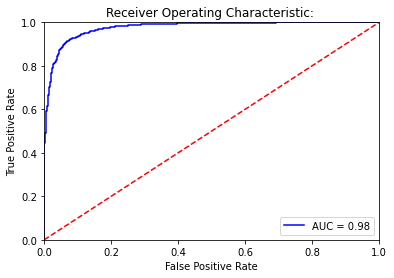

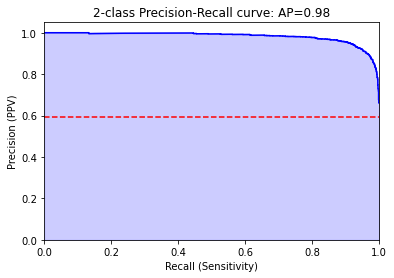

Threshold for best F1:
-0.20333472
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[1032  141]
 [  84 1611]]


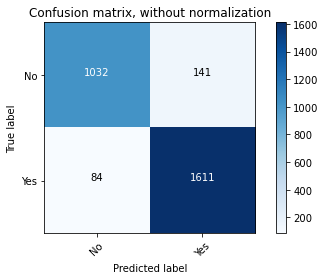

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.92      0.88      0.90      1173
         Yes       0.92      0.95      0.93      1695

    accuracy                           0.92      2868
   macro avg       0.92      0.92      0.92      2868
weighted avg       0.92      0.92      0.92      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[1083   90]
 [ 134 1561]]


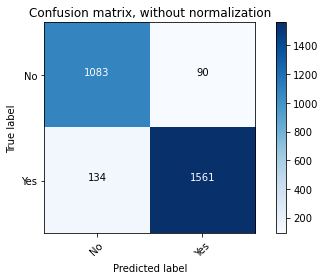

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.89      0.92      0.91      1173
         Yes       0.95      0.92      0.93      1695

    accuracy                           0.92      2868
   macro avg       0.92      0.92      0.92      2868
weighted avg       0.92      0.92      0.92      2868



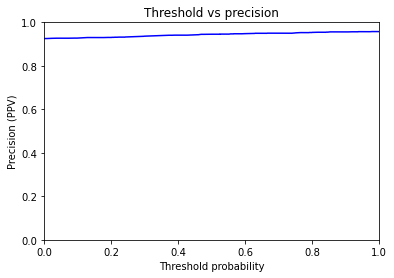

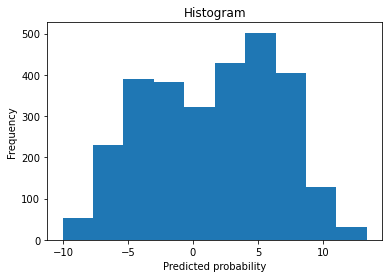

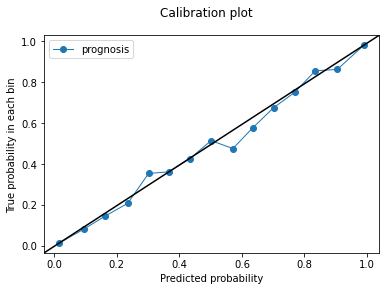



outcome: any_cancer
nsclc
AUC 0.9709528439474964
Outcome probability: 0.5641025641025641
Average precision score: 0.98
Best F1: 0.9243697478991597


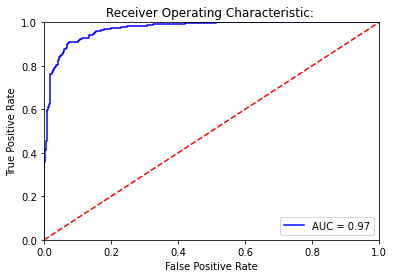

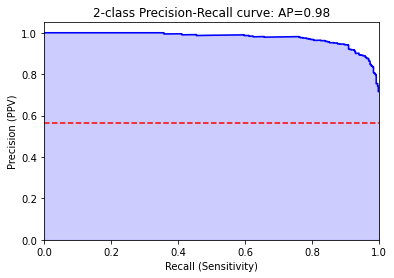

Threshold for best F1:
0.37279636
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[346  28]
 [ 44 440]]


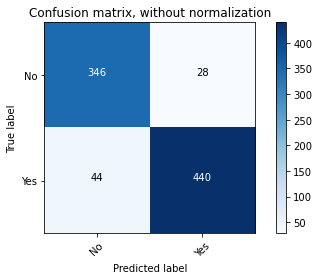

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.89      0.93      0.91       374
         Yes       0.94      0.91      0.92       484

    accuracy                           0.92       858
   macro avg       0.91      0.92      0.92       858
weighted avg       0.92      0.92      0.92       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[347  27]
 [ 48 436]]


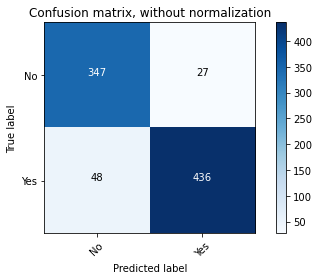

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.88      0.93      0.90       374
         Yes       0.94      0.90      0.92       484

    accuracy                           0.91       858
   macro avg       0.91      0.91      0.91       858
weighted avg       0.91      0.91      0.91       858



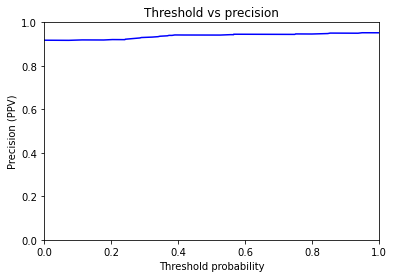

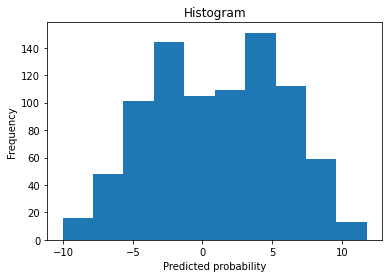

0.37279636


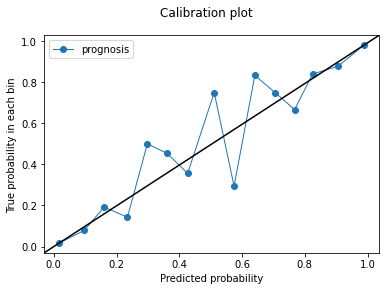

In [43]:
# run inference and evaluate models. By way of example, evaluation of full cohort across cancer types and of patients specifically with nsclc is illustrated.
cancer_type_list = ['nsclc']
cutoffs = {}
cutoffs['any_cancer'] = eval_outcome(output[output.split=='test'], 'any_cancer', cancer_type_list, graph=True)

outcome: progression
all cancer types
AUC 0.9545662989759358
Outcome probability: 0.2280334728033473
Average precision score: 0.88
Best F1: 0.7988338192419825


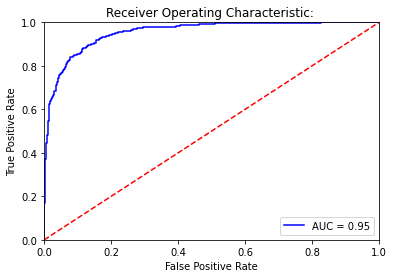

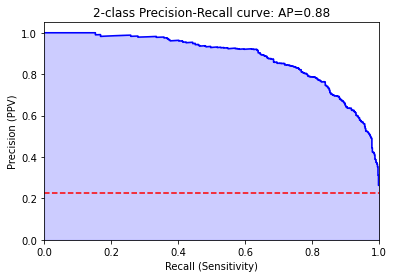

Threshold for best F1:
-0.49408722
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2044  170]
 [ 106  548]]


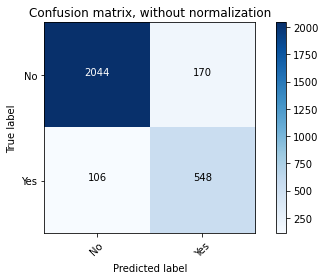

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.95      0.92      0.94      2214
         Yes       0.76      0.84      0.80       654

    accuracy                           0.90      2868
   macro avg       0.86      0.88      0.87      2868
weighted avg       0.91      0.90      0.91      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2131   83]
 [ 184  470]]


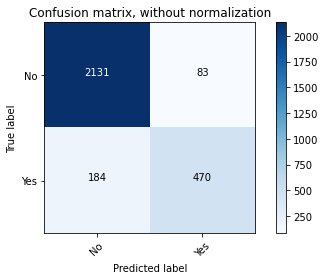

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.92      0.96      0.94      2214
         Yes       0.85      0.72      0.78       654

    accuracy                           0.91      2868
   macro avg       0.89      0.84      0.86      2868
weighted avg       0.90      0.91      0.90      2868



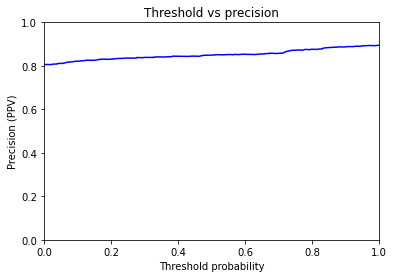

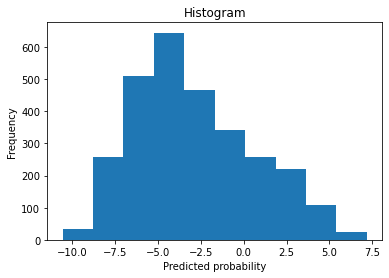

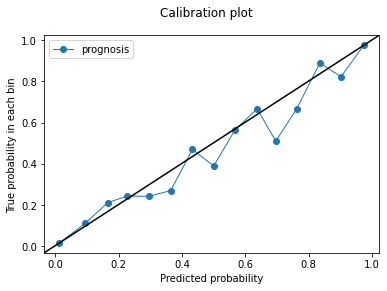



outcome: progression
nsclc
AUC 0.9647115968427443
Outcome probability: 0.21328671328671328
Average precision score: 0.90
Best F1: 0.8337730870712401


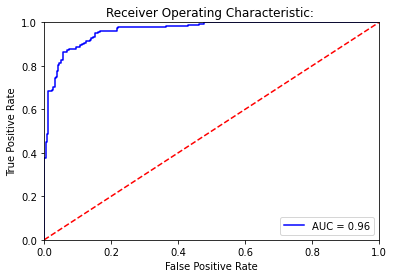

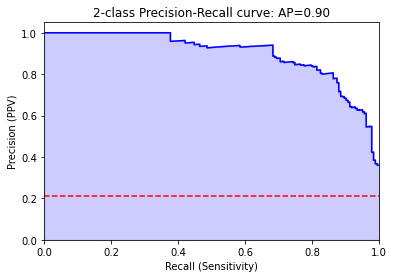

Threshold for best F1:
-0.2601741
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[637  38]
 [ 25 158]]


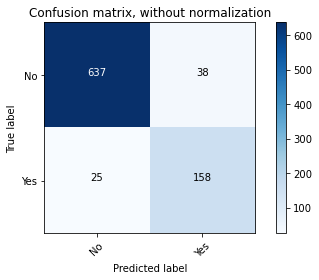

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.96      0.94      0.95       675
         Yes       0.81      0.86      0.83       183

    accuracy                           0.93       858
   macro avg       0.88      0.90      0.89       858
weighted avg       0.93      0.93      0.93       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[652  23]
 [ 46 137]]


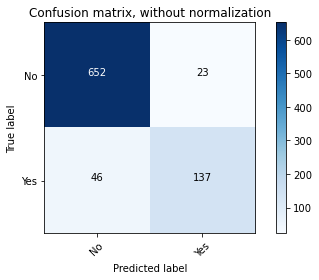

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.93      0.97      0.95       675
         Yes       0.86      0.75      0.80       183

    accuracy                           0.92       858
   macro avg       0.90      0.86      0.87       858
weighted avg       0.92      0.92      0.92       858



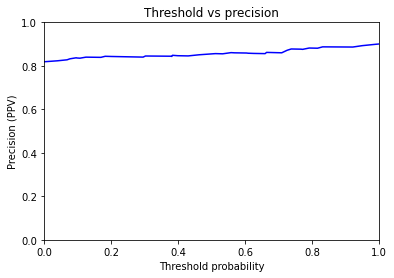

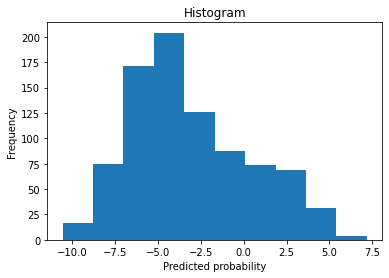

-0.2601741


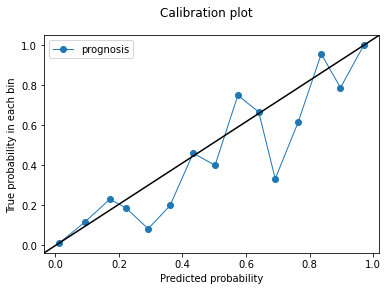

In [30]:
cutoffs['progression'] = eval_outcome(output[output.split=='test'], 'progression', cancer_type_list, graph=True)

outcome: response
all cancer types
AUC 0.9738251856030463
Outcome probability: 0.06450488145048815
Average precision score: 0.78
Best F1: 0.7427055702917772


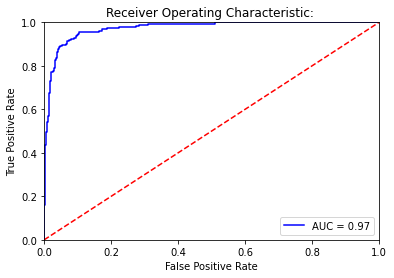

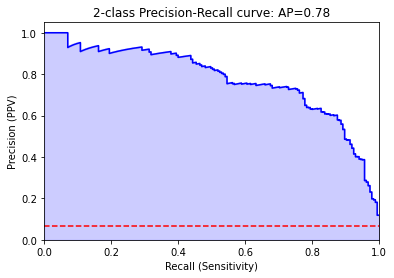

Threshold for best F1:
0.07620298
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2631   52]
 [  45  140]]


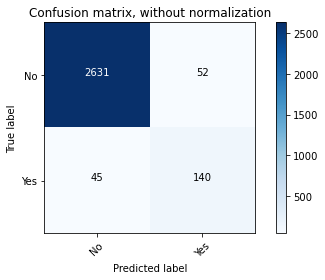

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2683
         Yes       0.73      0.76      0.74       185

    accuracy                           0.97      2868
   macro avg       0.86      0.87      0.86      2868
weighted avg       0.97      0.97      0.97      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2642   41]
 [  62  123]]


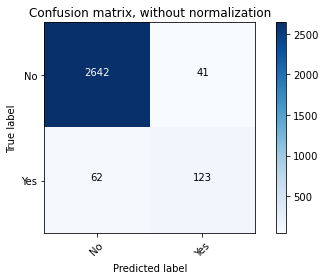

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2683
         Yes       0.75      0.66      0.70       185

    accuracy                           0.96      2868
   macro avg       0.86      0.82      0.84      2868
weighted avg       0.96      0.96      0.96      2868



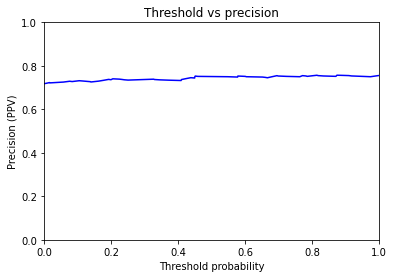

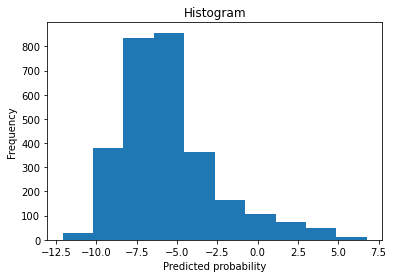

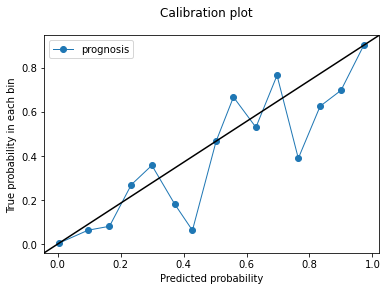



outcome: response
nsclc
AUC 0.9642167677881963
Outcome probability: 0.08624708624708624
Average precision score: 0.79
Best F1: 0.7586206896551724


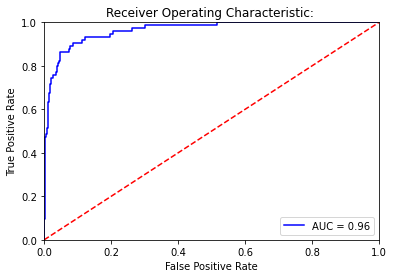

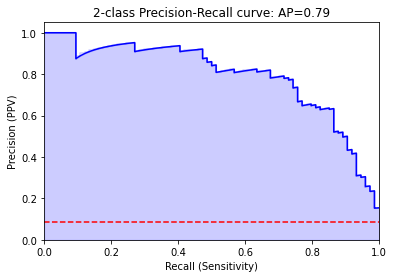

Threshold for best F1:
-0.07448765
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[768  16]
 [ 19  55]]


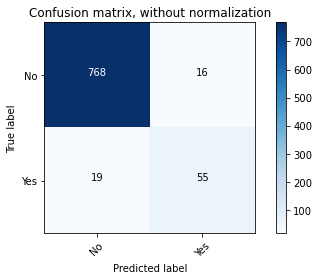

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.98      0.98       784
         Yes       0.77      0.74      0.76        74

    accuracy                           0.96       858
   macro avg       0.88      0.86      0.87       858
weighted avg       0.96      0.96      0.96       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[773  11]
 [ 24  50]]


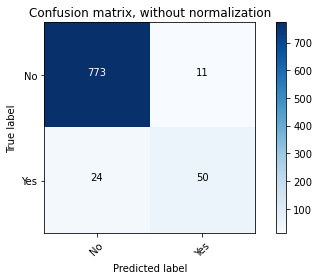

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.97      0.99      0.98       784
         Yes       0.82      0.68      0.74        74

    accuracy                           0.96       858
   macro avg       0.89      0.83      0.86       858
weighted avg       0.96      0.96      0.96       858



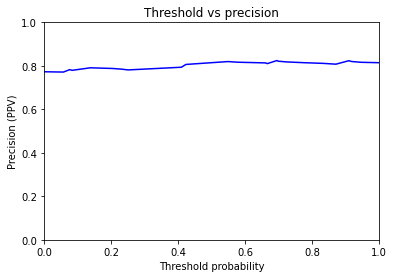

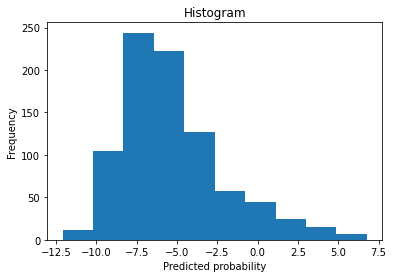

-0.07448765


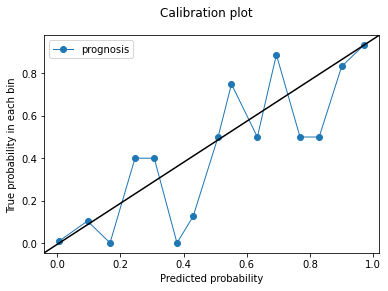

In [31]:
cutoffs['response'] = eval_outcome(output[output.split=='test'], 'response', cancer_type_list, graph=True)

outcome: brain_met
all cancer types
AUC 0.9888799410004492
Outcome probability: 0.07775453277545327
Average precision score: 0.89
Best F1: 0.8656716417910447


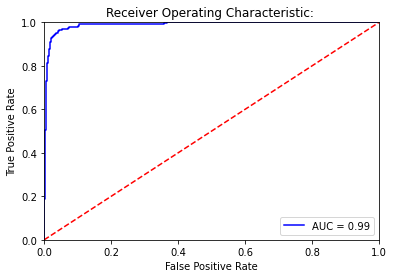

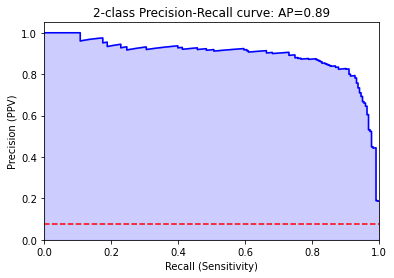

Threshold for best F1:
-1.1547686
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2602   43]
 [  20  203]]


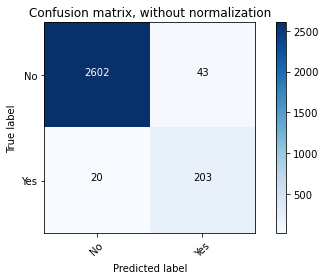

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.99      0.98      0.99      2645
         Yes       0.83      0.91      0.87       223

    accuracy                           0.98      2868
   macro avg       0.91      0.95      0.93      2868
weighted avg       0.98      0.98      0.98      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2619   26]
 [  42  181]]


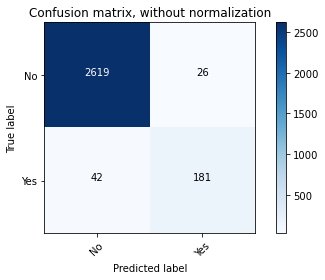

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.99      0.99      2645
         Yes       0.87      0.81      0.84       223

    accuracy                           0.98      2868
   macro avg       0.93      0.90      0.91      2868
weighted avg       0.98      0.98      0.98      2868



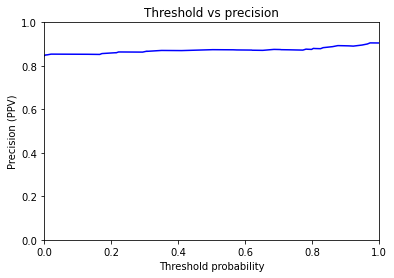

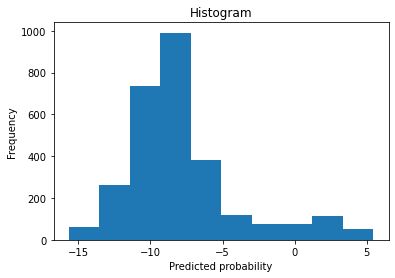

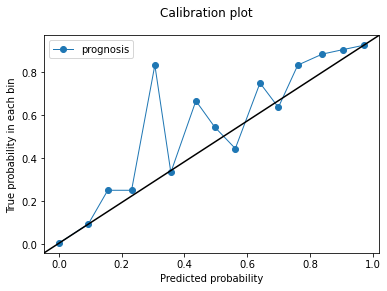



outcome: brain_met
nsclc
AUC 0.9898795180722892
Outcome probability: 0.09673659673659674
Average precision score: 0.91
Best F1: 0.8651685393258428


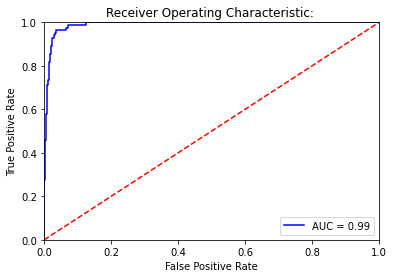

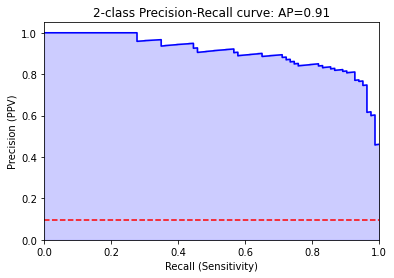

Threshold for best F1:
-0.82980376
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[757  18]
 [  6  77]]


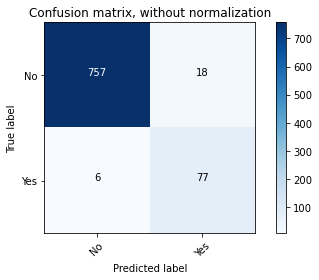

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.99      0.98      0.98       775
         Yes       0.81      0.93      0.87        83

    accuracy                           0.97       858
   macro avg       0.90      0.95      0.92       858
weighted avg       0.97      0.97      0.97       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[763  12]
 [ 18  65]]


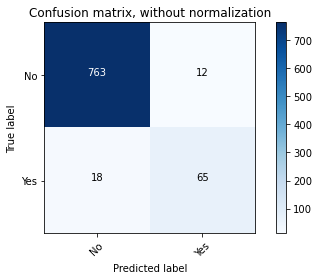

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.98      0.98       775
         Yes       0.84      0.78      0.81        83

    accuracy                           0.97       858
   macro avg       0.91      0.88      0.90       858
weighted avg       0.96      0.97      0.96       858



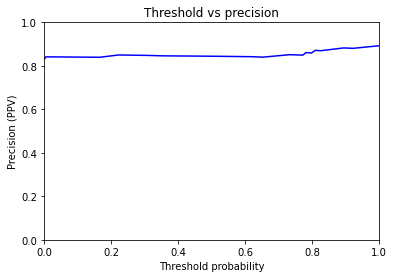

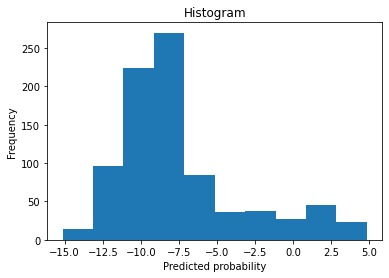

-0.82980376


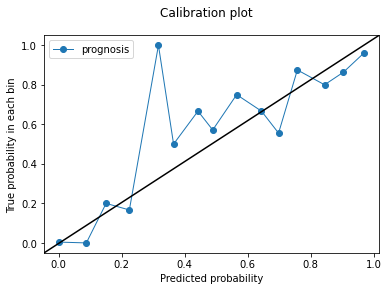

In [32]:
cutoffs['brain_met'] = eval_outcome(output[output.split=='test'], 'brain_met', cancer_type_list, graph=True)

outcome: lung_met
all cancer types
AUC 0.9825354732056757
Outcome probability: 0.1701534170153417
Average precision score: 0.92
Best F1: 0.8523290386521309


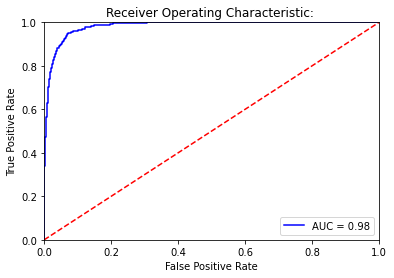

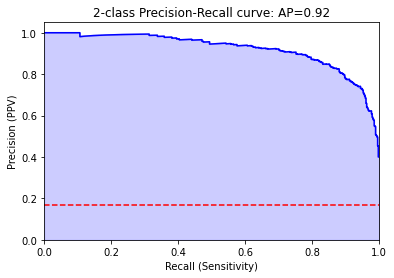

Threshold for best F1:
-0.63610125
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2289   91]
 [  58  430]]


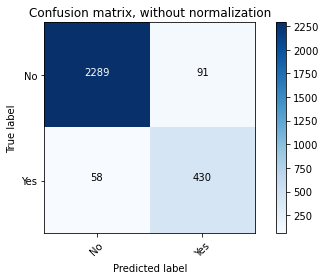

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.96      0.97      2380
         Yes       0.83      0.88      0.85       488

    accuracy                           0.95      2868
   macro avg       0.90      0.92      0.91      2868
weighted avg       0.95      0.95      0.95      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2337   43]
 [ 115  373]]


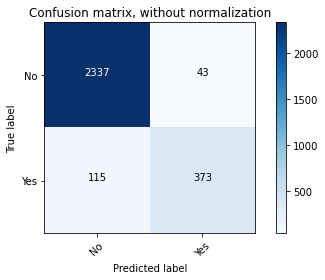

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.95      0.98      0.97      2380
         Yes       0.90      0.76      0.83       488

    accuracy                           0.94      2868
   macro avg       0.92      0.87      0.90      2868
weighted avg       0.94      0.94      0.94      2868



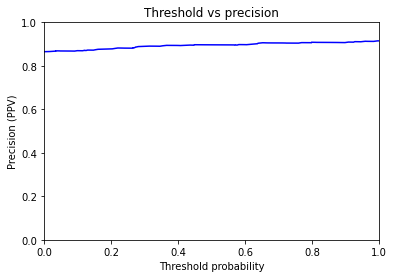

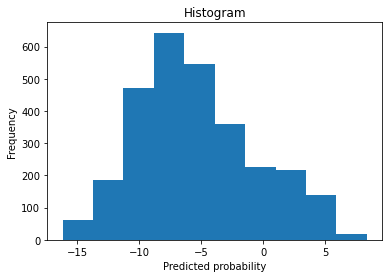

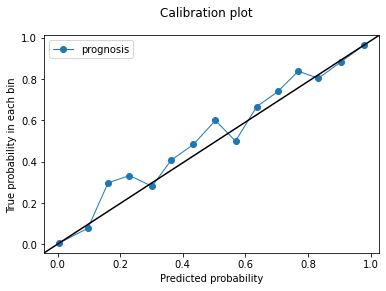



outcome: lung_met
nsclc
AUC 0.9681179592014266
Outcome probability: 0.32284382284382285
Average precision score: 0.93
Best F1: 0.8661971830985916


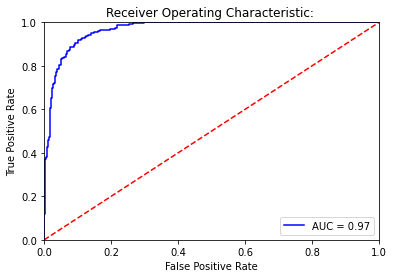

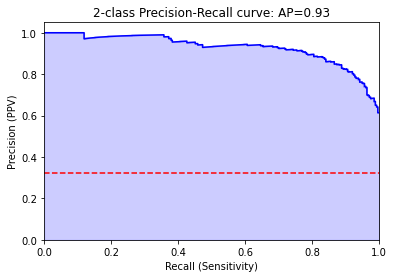

Threshold for best F1:
-0.5333845
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[536  45]
 [ 31 246]]


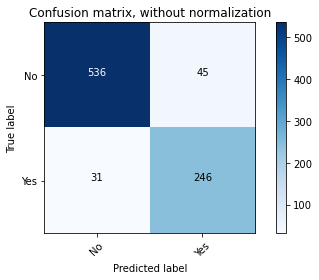

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.95      0.92      0.93       581
         Yes       0.85      0.89      0.87       277

    accuracy                           0.91       858
   macro avg       0.90      0.91      0.90       858
weighted avg       0.91      0.91      0.91       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[561  20]
 [ 65 212]]


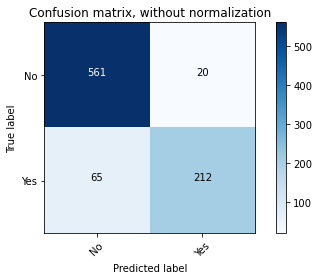

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.90      0.97      0.93       581
         Yes       0.91      0.77      0.83       277

    accuracy                           0.90       858
   macro avg       0.90      0.87      0.88       858
weighted avg       0.90      0.90      0.90       858



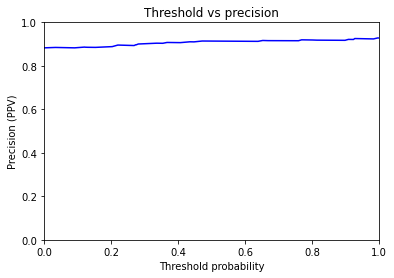

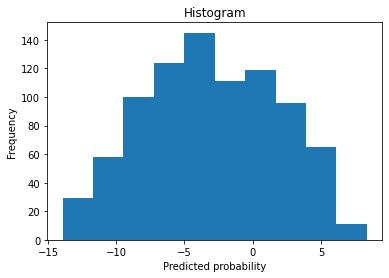

-0.5333845


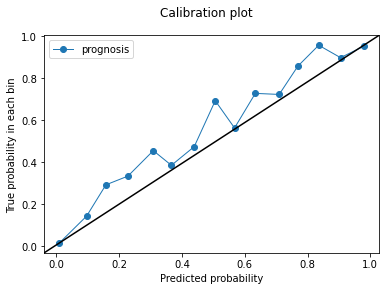

In [33]:
cutoffs['lung_met'] = eval_outcome(output[output.split=='test'], 'lung_met', cancer_type_list, graph=True)

outcome: bone_met
all cancer types
AUC 0.9877595837389329
Outcome probability: 0.21338912133891214
Average precision score: 0.95
Best F1: 0.9022435897435896


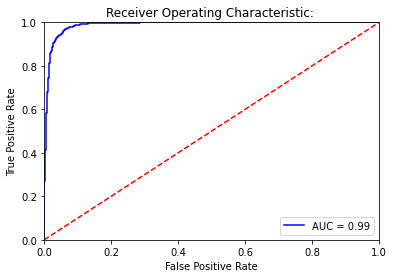

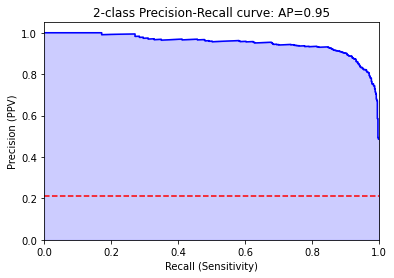

Threshold for best F1:
-0.84931606
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2183   73]
 [  49  563]]


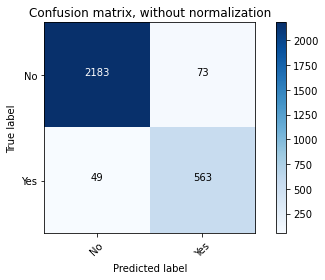

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.97      0.97      2256
         Yes       0.89      0.92      0.90       612

    accuracy                           0.96      2868
   macro avg       0.93      0.94      0.94      2868
weighted avg       0.96      0.96      0.96      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2215   41]
 [  91  521]]


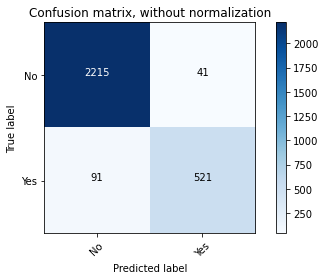

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.96      0.98      0.97      2256
         Yes       0.93      0.85      0.89       612

    accuracy                           0.95      2868
   macro avg       0.94      0.92      0.93      2868
weighted avg       0.95      0.95      0.95      2868



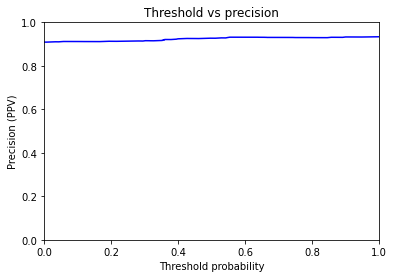

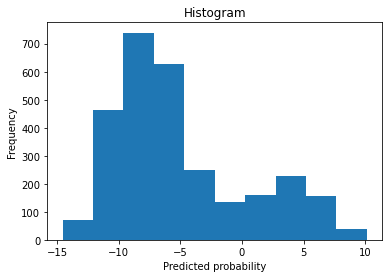

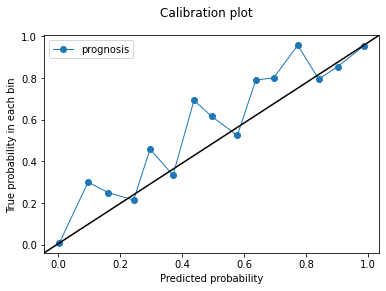



outcome: bone_met
nsclc
AUC 0.9844197530864196
Outcome probability: 0.1258741258741259
Average precision score: 0.89
Best F1: 0.8355555555555555


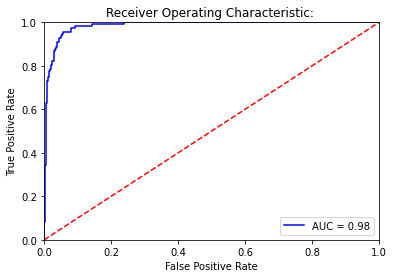

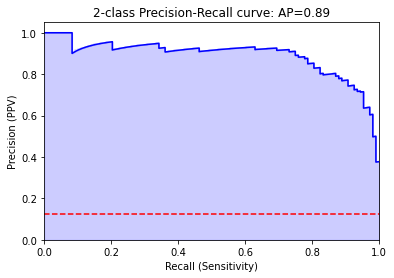

Threshold for best F1:
-1.9188347
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[727  23]
 [ 14  94]]


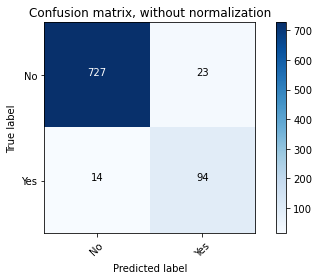

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.97      0.98       750
         Yes       0.80      0.87      0.84       108

    accuracy                           0.96       858
   macro avg       0.89      0.92      0.91       858
weighted avg       0.96      0.96      0.96       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[743   7]
 [ 33  75]]


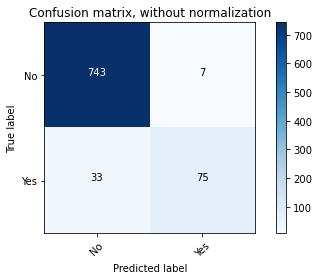

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.96      0.99      0.97       750
         Yes       0.91      0.69      0.79       108

    accuracy                           0.95       858
   macro avg       0.94      0.84      0.88       858
weighted avg       0.95      0.95      0.95       858



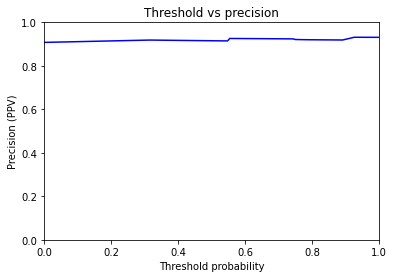

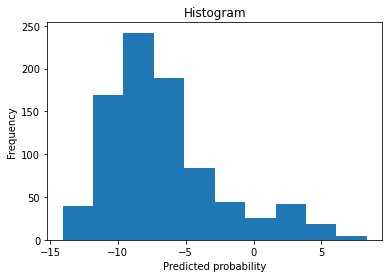

-1.9188347


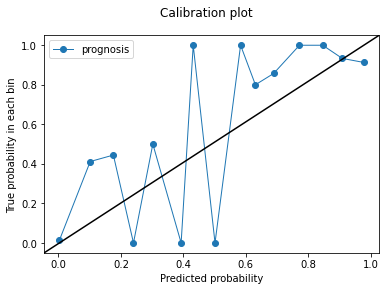

In [34]:
cutoffs['bone_met'] = eval_outcome(output[output.split=='test'], 'bone_met', cancer_type_list, graph=True)

outcome: liver_met
all cancer types
AUC 0.9920509008793967
Outcome probability: 0.12517433751743376
Average precision score: 0.95
Best F1: 0.8916666666666667


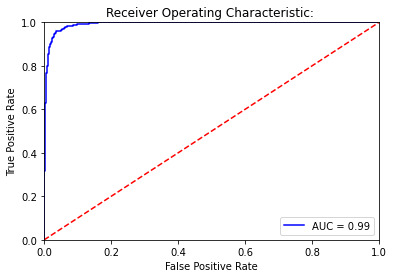

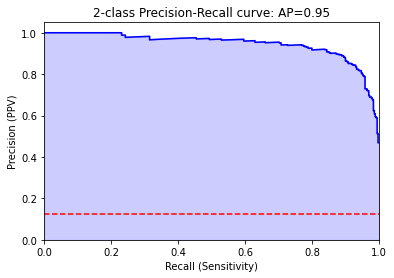

Threshold for best F1:
-0.5968014
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2469   40]
 [  38  321]]


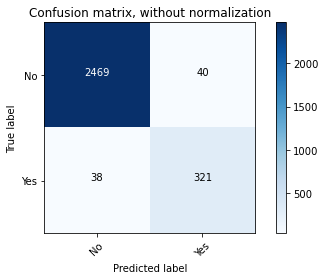

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2509
         Yes       0.89      0.89      0.89       359

    accuracy                           0.97      2868
   macro avg       0.94      0.94      0.94      2868
weighted avg       0.97      0.97      0.97      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2488   21]
 [  77  282]]


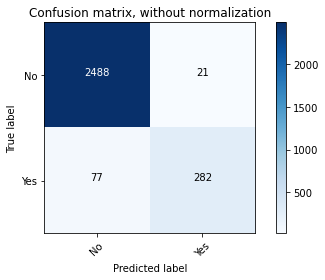

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.97      0.99      0.98      2509
         Yes       0.93      0.79      0.85       359

    accuracy                           0.97      2868
   macro avg       0.95      0.89      0.92      2868
weighted avg       0.97      0.97      0.96      2868



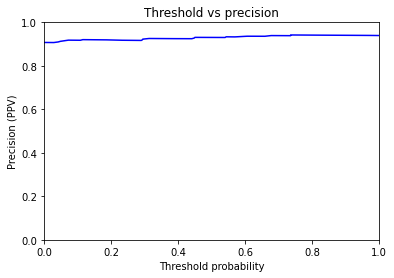

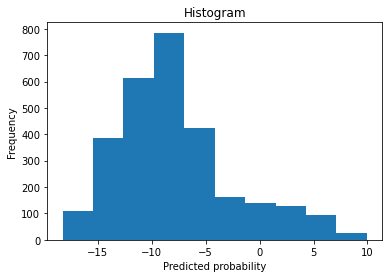

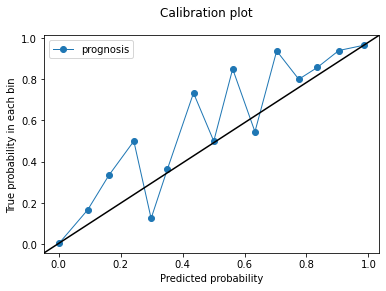



outcome: liver_met
nsclc
AUC 0.9920607591062137
Outcome probability: 0.07692307692307693
Average precision score: 0.93
Best F1: 0.8507462686567164


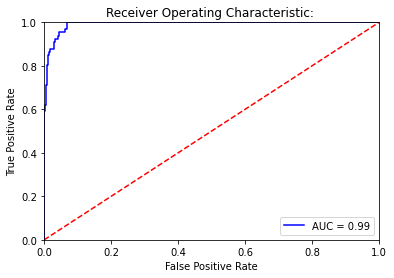

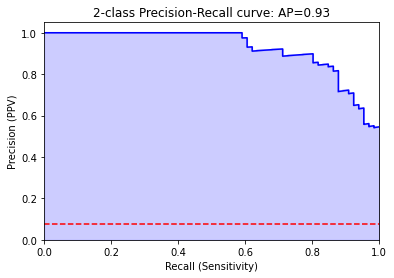

Threshold for best F1:
-2.1299558
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[781  11]
 [  9  57]]


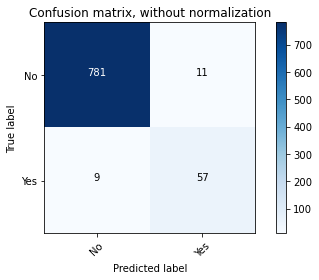

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.99      0.99      0.99       792
         Yes       0.84      0.86      0.85        66

    accuracy                           0.98       858
   macro avg       0.91      0.92      0.92       858
weighted avg       0.98      0.98      0.98       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[791   1]
 [ 26  40]]


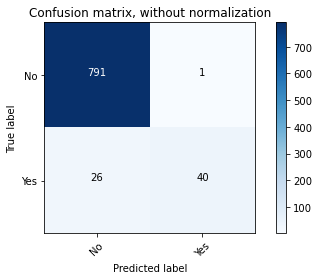

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.97      1.00      0.98       792
         Yes       0.98      0.61      0.75        66

    accuracy                           0.97       858
   macro avg       0.97      0.80      0.87       858
weighted avg       0.97      0.97      0.97       858



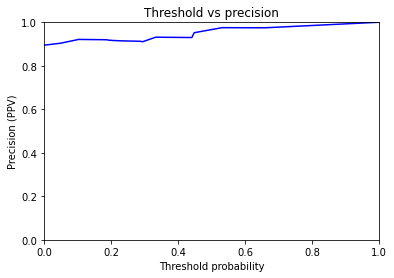

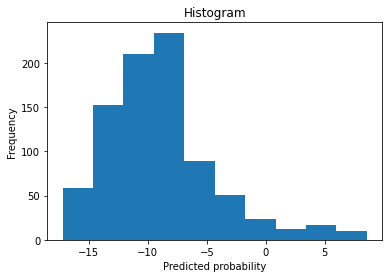

-2.1299558


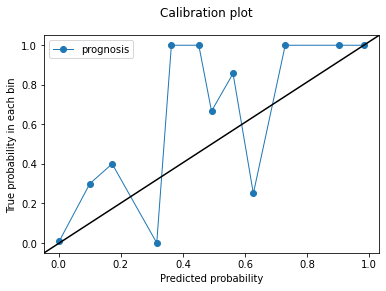

In [35]:
cutoffs['liver_met'] = eval_outcome(output[output.split=='test'], 'liver_met', cancer_type_list, graph=True)

outcome: adrenal_met
all cancer types
AUC 0.987950829454589
Outcome probability: 0.02615062761506276
Average precision score: 0.82
Best F1: 0.7757575757575759


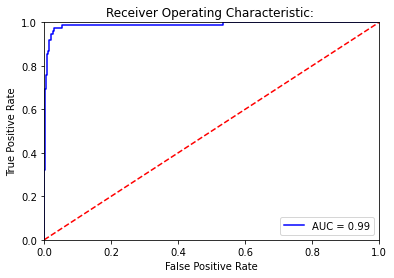

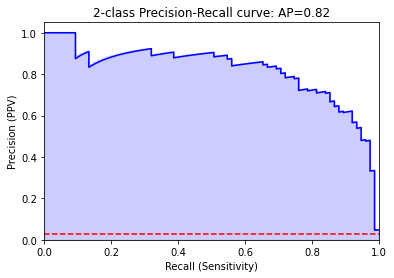

Threshold for best F1:
-0.92025596
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2767   26]
 [  11   64]]


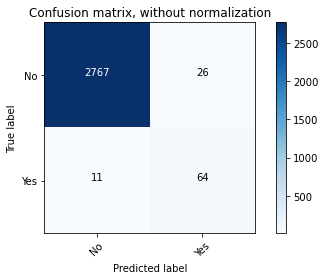

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       1.00      0.99      0.99      2793
         Yes       0.71      0.85      0.78        75

    accuracy                           0.99      2868
   macro avg       0.85      0.92      0.88      2868
weighted avg       0.99      0.99      0.99      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2785    8]
 [  27   48]]


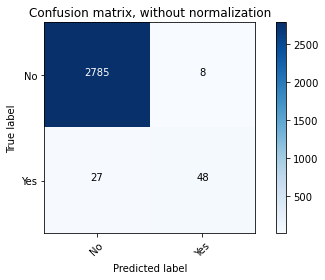

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.99      1.00      0.99      2793
         Yes       0.86      0.64      0.73        75

    accuracy                           0.99      2868
   macro avg       0.92      0.82      0.86      2868
weighted avg       0.99      0.99      0.99      2868



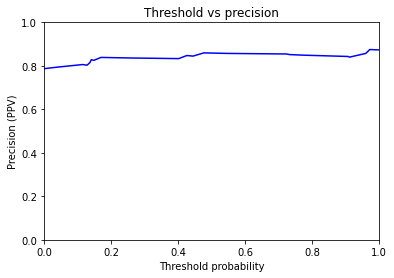

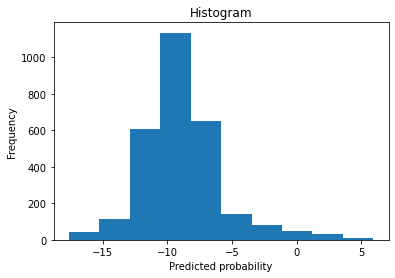

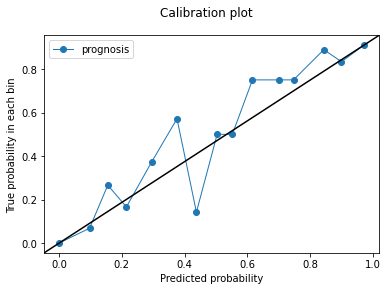



outcome: adrenal_met
nsclc
AUC 0.9950742432895489
Outcome probability: 0.039627039627039624
Average precision score: 0.87
Best F1: 0.8529411764705882


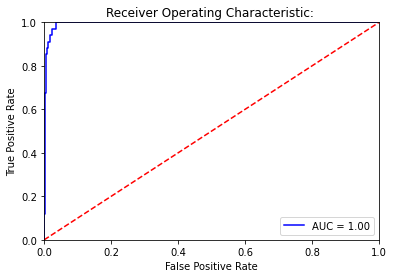

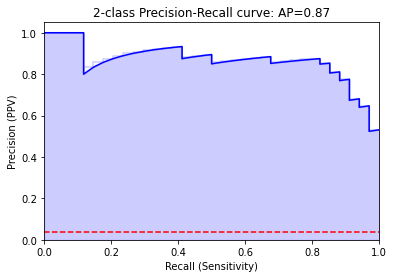

Threshold for best F1:
0.11480718
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[819   5]
 [  5  29]]


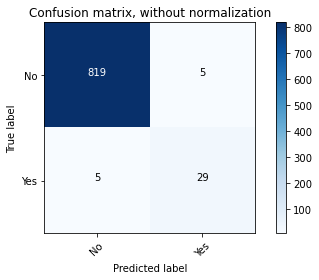

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.99      0.99      0.99       824
         Yes       0.85      0.85      0.85        34

    accuracy                           0.99       858
   macro avg       0.92      0.92      0.92       858
weighted avg       0.99      0.99      0.99       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[820   4]
 [  8  26]]


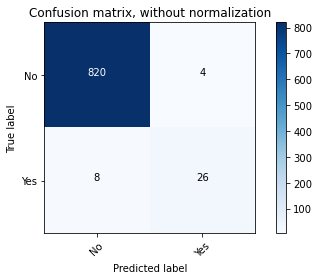

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.99      1.00      0.99       824
         Yes       0.87      0.76      0.81        34

    accuracy                           0.99       858
   macro avg       0.93      0.88      0.90       858
weighted avg       0.99      0.99      0.99       858



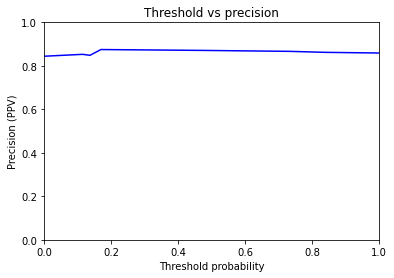

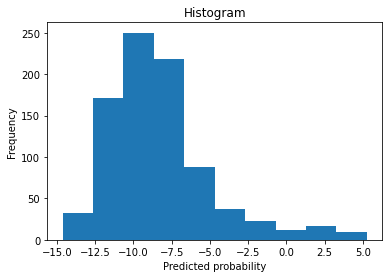

0.11480718


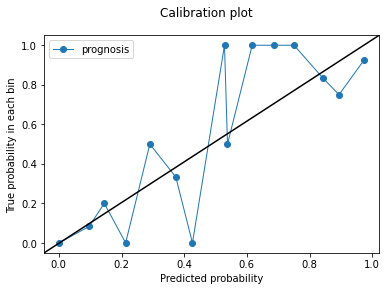

In [36]:
cutoffs['adrenal_met'] = eval_outcome(output[output.split=='test'], 'adrenal_met', cancer_type_list, graph=True)

outcome: node_met
all cancer types
AUC 0.9799435690532594
Outcome probability: 0.11820083682008369
Average precision score: 0.88
Best F1: 0.8066759388038943


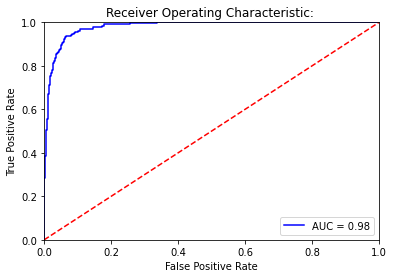

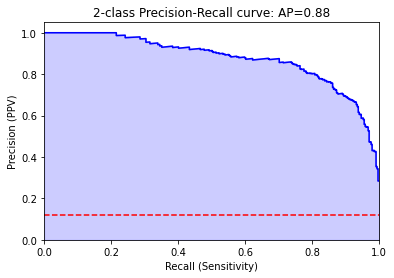

Threshold for best F1:
-0.5553727
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2439   90]
 [  49  290]]


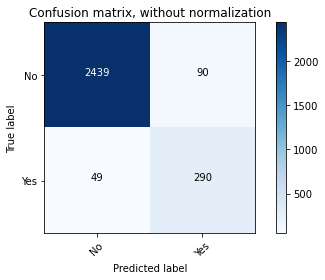

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.98      0.96      0.97      2529
         Yes       0.76      0.86      0.81       339

    accuracy                           0.95      2868
   macro avg       0.87      0.91      0.89      2868
weighted avg       0.95      0.95      0.95      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2483   46]
 [  85  254]]


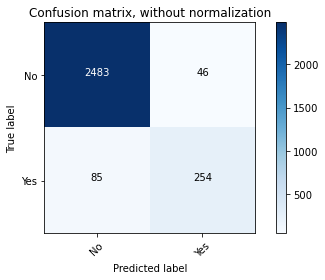

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.97      0.98      0.97      2529
         Yes       0.85      0.75      0.79       339

    accuracy                           0.95      2868
   macro avg       0.91      0.87      0.88      2868
weighted avg       0.95      0.95      0.95      2868



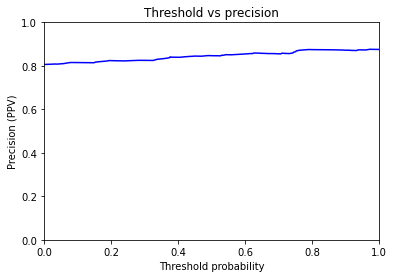

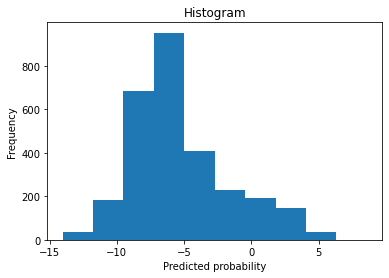

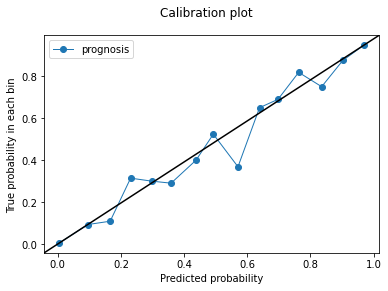



outcome: node_met
nsclc
AUC 0.9822715895590389
Outcome probability: 0.13636363636363635
Average precision score: 0.92
Best F1: 0.81981981981982


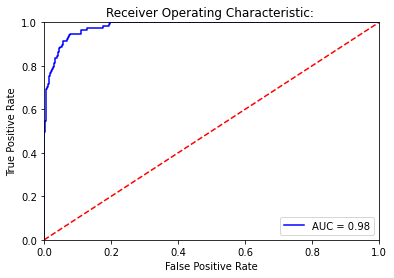

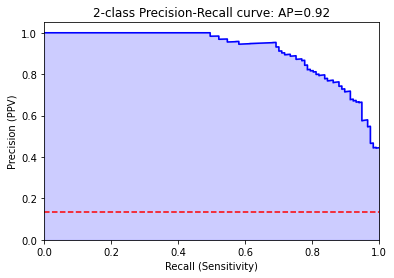

Threshold for best F1:
0.033649363
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[727  14]
 [ 26  91]]


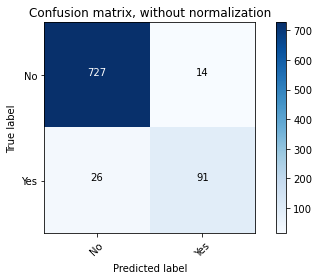

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.97      0.98      0.97       741
         Yes       0.87      0.78      0.82       117

    accuracy                           0.95       858
   macro avg       0.92      0.88      0.90       858
weighted avg       0.95      0.95      0.95       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[733   8]
 [ 34  83]]


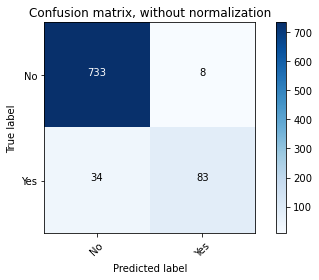

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.96      0.99      0.97       741
         Yes       0.91      0.71      0.80       117

    accuracy                           0.95       858
   macro avg       0.93      0.85      0.89       858
weighted avg       0.95      0.95      0.95       858



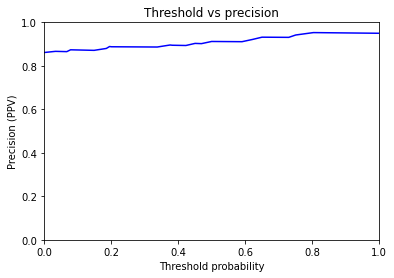

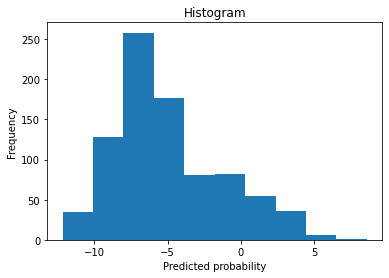

0.033649363


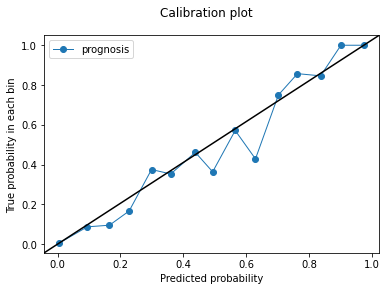

In [37]:
cutoffs['node_met'] = eval_outcome(output[output.split=='test'], 'node_met', cancer_type_list, graph=True)

outcome: peritoneal_met
all cancer types
AUC 0.9869203617823888
Outcome probability: 0.03103207810320781
Average precision score: 0.85
Best F1: 0.8172043010752688


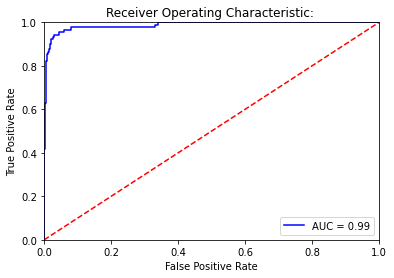

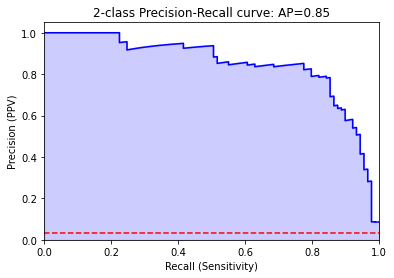

Threshold for best F1:
-1.3966254
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[2758   21]
 [  13   76]]


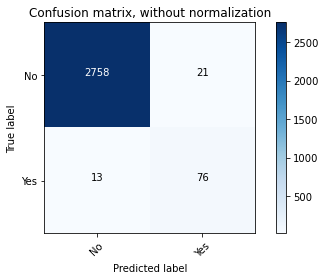

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       1.00      0.99      0.99      2779
         Yes       0.78      0.85      0.82        89

    accuracy                           0.99      2868
   macro avg       0.89      0.92      0.91      2868
weighted avg       0.99      0.99      0.99      2868

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[2767   12]
 [  26   63]]


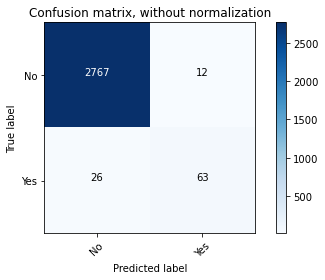

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       0.99      1.00      0.99      2779
         Yes       0.84      0.71      0.77        89

    accuracy                           0.99      2868
   macro avg       0.92      0.85      0.88      2868
weighted avg       0.99      0.99      0.99      2868



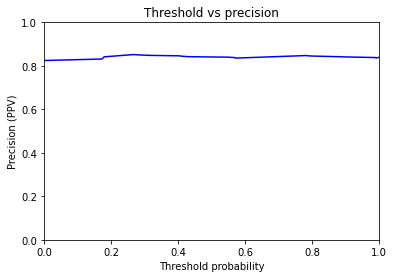

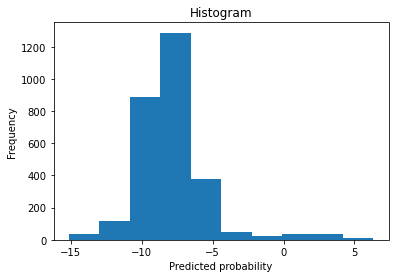

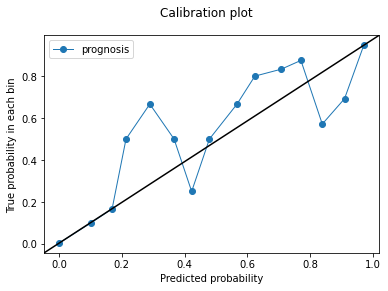



outcome: peritoneal_met
nsclc
AUC 0.9997641509433963
Outcome probability: 0.011655011655011656
Average precision score: 0.98
Best F1: 0.9523809523809523


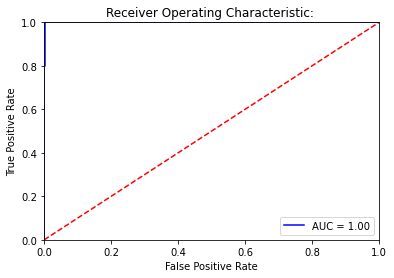

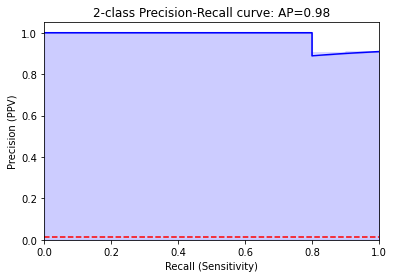

Threshold for best F1:
0.43103084
Confusion matrix at best F1 thresh:
Confusion matrix, without normalization
[[847   1]
 [  0  10]]


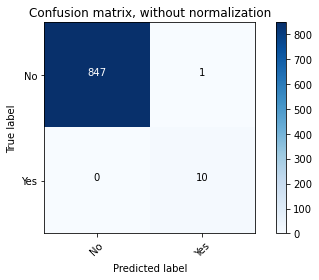

Metrics at best F1 thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       848
         Yes       0.91      1.00      0.95        10

    accuracy                           1.00       858
   macro avg       0.95      1.00      0.98       858
weighted avg       1.00      1.00      1.00       858

Confusion matrix at 0.5 thresh:
Confusion matrix, without normalization
[[847   1]
 [  1   9]]


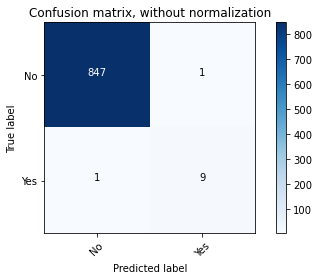

Metrics at 0.5 thresh thresh (specificity is recall for negative class):
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       848
         Yes       0.90      0.90      0.90        10

    accuracy                           1.00       858
   macro avg       0.95      0.95      0.95       858
weighted avg       1.00      1.00      1.00       858



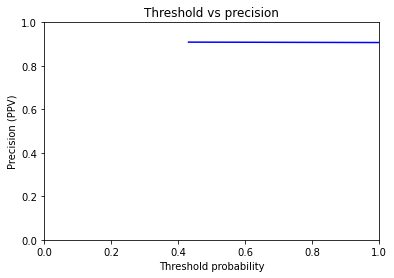

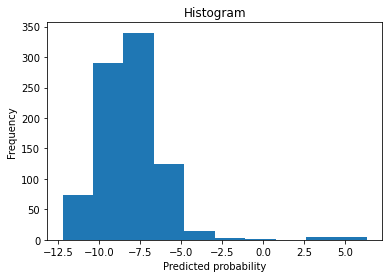

0.43103084


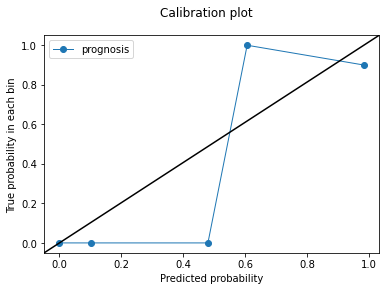

In [38]:
cutoffs['peritoneal_met'] = eval_outcome(output[output.split=='test'], 'peritoneal_met', cancer_type_list, graph=True)

In [39]:

for outcome in ['any_cancer','progression','response','brain_met','lung_met','bone_met','liver_met', 'adrenal_met','node_met','peritoneal_met']:
    output[outcome+'_cutoff'] = cutoffs[outcome]
    output[outcome+'_prediction'] = np.where(output['cv_' + outcome + '_prediction'] >= output[outcome+'_cutoff'], 1, 0)




In [48]:
# curate full unlabeled data set
all_imaging = pd.read_csv(prefix+'profile_2021/derived_data/curate_all/all_imaging.csv')
all_imaging = all_imaging[~all_imaging.scan_type.str.contains('NO INTERPRETATION')]
all_imaging['date'] = pd.to_datetime(all_imaging.date)

eval_imaging = all_imaging[~all_imaging.dfci_mrn.isin(label_analysis.dfci_mrn)]

In [49]:
x_text = sequence.pad_sequences(tokenizer.texts_to_sequences([str(x) for x in eval_imaging['text']]), maxlen=max_note_length, padding='post')

prediction_split = eval_imaging


for j in ['any_cancer', 'progression', 'response', 'brain_met', 'bone_met', 'adrenal_met', 'liver_met', 'lung_met', 'node_met', 'peritoneal_met']:
    this_model = get_ensemble_model(j)
    prediction_split['cv_'+j+'_prediction'] = this_model.predict(x_text)

    prediction_split[j+'_cutoff'] = cutoffs[j]
    prediction_split[j+'_prediction'] = np.where(prediction_split['cv_' + j + '_prediction'] >= prediction_split[j+'_cutoff'], 1, 0)

    

In [52]:
# unlabeled data
prediction_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462028 entries, 0 to 675737
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Unnamed: 0                    462028 non-null  int64         
 1   dfci_mrn                      462028 non-null  int64         
 2   date                          462028 non-null  datetime64[ns]
 3   text                          462028 non-null  object        
 4   scan_type                     462028 non-null  object        
 5   new_rx_30d                    462028 non-null  float64       
 6   died_90d                      462028 non-null  int64         
 7   died_180d                     462028 non-null  int64         
 8   died_270d                     462028 non-null  int64         
 9   died_360d                     462028 non-null  int64         
 10  primary_cancer_diagnosis      462028 non-null  object        
 11  genomics_date

In [53]:
unlabeled = prediction_split[['dfci_mrn','date','text','scan_type','new_rx_30d','died_90d','died_180d','died_270d','died_360d','primary_cancer_diagnosis','genomics_date','after_profile','split','cv_any_cancer_prediction','cv_progression_prediction','cv_response_prediction','cv_brain_met_prediction','cv_bone_met_prediction','cv_adrenal_met_prediction','cv_liver_met_prediction','cv_lung_met_prediction','cv_node_met_prediction','cv_peritoneal_met_prediction', 'any_cancer_prediction','progression_prediction','response_prediction','brain_met_prediction','bone_met_prediction','adrenal_met_prediction','liver_met_prediction','lung_met_prediction','node_met_prediction','peritoneal_met_prediction','any_cancer_cutoff','progression_cutoff','response_cutoff','brain_met_cutoff','bone_met_cutoff','adrenal_met_cutoff','liver_met_cutoff','lung_met_cutoff','node_met_cutoff','peritoneal_met_cutoff']]
unlabeled['labeled'] = 0.

In [54]:
# labeled data
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    31360 non-null  int64  
 1   dfci_mrn                      31360 non-null  float64
 2   cancer_type                   31360 non-null  object 
 3   image_scan_type               31360 non-null  float64
 4   date                          31360 non-null  object 
 5   head_imaged                   31360 non-null  float64
 6   neck_imaged                   31360 non-null  float64
 7   spine_imaged                  31360 non-null  float64
 8   chest_imaged                  31360 non-null  float64
 9   abdomen_imaged                31360 non-null  float64
 10  pelvis_imaged                 31360 non-null  float64
 11  any_cancer                    31360 non-null  int64  
 12  progression                   31360 non-null  int64  
 13  r

In [55]:
labeled = output[['dfci_mrn','date','text','scan_type','new_rx_30d','died_90d','died_180d','died_270d','died_360d','primary_cancer_diagnosis','genomics_date','after_profile','split','cv_any_cancer_prediction','cv_progression_prediction','cv_response_prediction','cv_brain_met_prediction','cv_bone_met_prediction','cv_adrenal_met_prediction','cv_liver_met_prediction','cv_lung_met_prediction','cv_node_met_prediction','cv_peritoneal_met_prediction', 'any_cancer_prediction','progression_prediction','response_prediction','brain_met_prediction','bone_met_prediction','adrenal_met_prediction','liver_met_prediction','lung_met_prediction','node_met_prediction','peritoneal_met_prediction','any_cancer_cutoff','progression_cutoff','response_cutoff','brain_met_cutoff','bone_met_cutoff','adrenal_met_cutoff','liver_met_cutoff','lung_met_cutoff','node_met_cutoff','peritoneal_met_cutoff', 'any_cancer','progression','response','brain_met','bone_met','adrenal_met','liver_met','lung_met','node_met','peritoneal_met','cancer_type']]

labeled['split'] = np.where(labeled.split == 'valid','validation',labeled.split)
labeled['labeled'] = 1.

In [56]:
labeled.split.value_counts()

validation    2907
test          2868
train_4       2775
train_8       2752
train_1       2691
train_3       2620
train_7       2611
train_5       2588
train_6       2487
train_2       2452
train_0       2321
train_9       2288
Name: split, dtype: int64

In [57]:
unlabeled.split.value_counts()

train         370117
test           47246
validation     44665
Name: split, dtype: int64

In [58]:
unlabeled.dfci_mrn.isin(labeled.dfci_mrn).value_counts()

False    462028
Name: dfci_mrn, dtype: int64

In [59]:
labeled.dfci_mrn.isin(unlabeled.dfci_mrn).value_counts()

False    31360
Name: dfci_mrn, dtype: int64

In [60]:
final_output = pd.concat([labeled, unlabeled], axis=0).sort_values(by=['dfci_mrn','date']).reset_index(drop=True)

In [61]:
final_output.response.isnull().value_counts()

True     462028
False     31360
Name: response, dtype: int64

In [62]:
datafolder = prefix+'profile_2021/derived_data/curate_all/'

final_output.to_csv(datafolder+'all_imaging_curated'+extra_model_label+'.csv')

In [63]:
final_output.cancer_type.value_counts()

nsclc           8838
breast          5527
prostate        4763
crc             4588
pancreas        3509
rcc_barkouny    3016
bladder_xu      1119
Name: cancer_type, dtype: int64